In [18]:
#Please Put X_train.npy,Y_train.npy,X_test.npy in current directory -Dataset- https://drive.google.com/drive/folders/1NblOOdNrirnYtTF1cO9GJtoqfSTgXZPX
import numpy as np
X_train=np.load('X_train.npy')
print(X_train.shape)
sample_image=X_train[1]/255.0

(4160, 50, 50, 3)


In [19]:
y_train=np.load('Y_train.npy')
X_test=np.load('X_test.npy')
y_train.shape,X_test.shape

((4160,), (1387, 50, 50, 3))

In [20]:
type(X_test)

numpy.ndarray

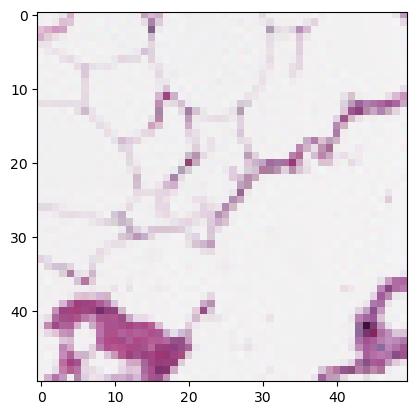

In [21]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0]/255)
plt.show()

In [22]:
import torch
import torchvision
import torchvision.transforms as transforms

In [23]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CustomDataset(Dataset):
    def __init__(self, X, y=None, transform=None):
        self.X = torch.tensor(X / 255, dtype=torch.float32).permute(0, 3, 1, 2) 
        self.y = torch.tensor(y, dtype=torch.long) if y is not None else None
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        img = self.X[idx]
        label = self.y[idx] if self.y is not None else None
        if self.transform:
            img = self.transform(img)
        return img, label

train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test)

transform = transforms.Compose([])

train_dataset.transform = transform
test_dataset.transform = transform

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 12 * 12, 128)  
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(x.size(0), -1)  
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, train_loader, criterion, optimizer, epochs=50):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

train(model, train_loader, criterion, optimizer)

Epoch 1, Loss: 0.6209444621434579
Epoch 2, Loss: 0.5642333885798088
Epoch 3, Loss: 0.5457332778435487
Epoch 4, Loss: 0.5243296996905253
Epoch 5, Loss: 0.4984188341177427
Epoch 6, Loss: 0.4992279073366752
Epoch 7, Loss: 0.4780701864224214
Epoch 8, Loss: 0.47416294721456675
Epoch 9, Loss: 0.4484726281120227
Epoch 10, Loss: 0.4575191555114893
Epoch 11, Loss: 0.4283696039364888
Epoch 12, Loss: 0.40297797070099756
Epoch 13, Loss: 0.39865275827737956
Epoch 14, Loss: 0.379387322641336
Epoch 15, Loss: 0.35556870286281295
Epoch 16, Loss: 0.32963290168688847
Epoch 17, Loss: 0.30532866298006134
Epoch 18, Loss: 0.30012738240452913
Epoch 19, Loss: 0.24330368918868212
Epoch 20, Loss: 0.22929339460455456
Epoch 21, Loss: 0.2086929736802211
Epoch 22, Loss: 0.17936428429988716
Epoch 23, Loss: 0.1572857654152008
Epoch 24, Loss: 0.128674927009986
Epoch 25, Loss: 0.11374162616064916
Epoch 26, Loss: 0.10451829939220961
Epoch 27, Loss: 0.10021100108726666
Epoch 28, Loss: 0.08908784029862056
Epoch 29, Loss: 0

In [24]:
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F

X_test = np.load('X_test.npy')

class TestDataset(Dataset):
    def __init__(self, X, transform=None):
        self.X = torch.tensor(X / 255, dtype=torch.float32).permute(0, 3, 1, 2)
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        img = self.X[idx]
        if self.transform:
            img = self.transform(img)
        return img

transform = transforms.Compose([])

test_dataset = TestDataset(X_test, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

def test(model, test_loader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for data in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.tolist())
    return predictions

model.eval() 
predicted_labels = test(model, test_loader)

print(predicted_labels)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 

In [27]:
import pandas as pd
df=pd.DataFrame(predicted_labels)
df.to_csv('Upesh_Jeengar.csv')